<a href="https://colab.research.google.com/github/chunyuan0221/3rd-ML100days/blob/master/Day101_103_Final_test(flower_classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flowers classifier專案流程
***
### 1.載入資料並轉換Array(Load image data and transform to array)

### 2.儲存資料(Save array data)

### 3.載入陣列資料(Load array data)

### 4.資料前處理(Data perprocess)

### 5.訓練資料分割(Training Data split to train and test)

### 6.模型建立(Create Model)

### 7.優化模型準確率方法

### 8.進行模型擬合

### 9.載入最佳模型或weights

### 10.進行預測資料的預測

### 1.載入資料
***
- 我們可以透過code，將資料從Google Drive載入。
  - from google.colab import drive
  - google drive 的基礎路徑 : '/content/drive/' ，執行時會需要登入驗證
  - 進入後，我們可以再輸入我們資料放置的路徑

In [1]:
import os
from google.colab import drive
path = drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


- 透過ls或os.listdir()就可以看目前路徑下，因此我們可以看到已經轉到Drive的根目錄(root_path)

In [2]:
ls

drive/  sample_data/


### 1.載入資料
***
- 載入圖片&轉換資料型態：處理好資料路徑後，我們可以正式將training data和testing data載入，由於我們要載入的是圖片，因此可以用keras內建代碼或另外使用cv2
  - from keras.preprocessing.image import img_to_array, load
  
- 加入進度表：由於載入圖片並轉換為array型態很花時間，因此加入進度表觀察狀況

In [3]:
import numpy as np
# save array data
from numpy import save

# load image and tranform to array type
import keras
from keras.preprocessing.image import img_to_array, load_img

# for進度表
from tqdm import trange
from time import sleep

# for image visiulization
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### 1.載入資料
***
- def load_xtrain_ytrian_img( )：第一次載入training圖片使用，同時進行以下動作:
  1. image to array：圖片轉陣列
  2. label：以數字標記每種花類別
- def load_predict_img( )：第一次載入預測圖片使用，同時進行以下動作：
  1. image to array：圖片轉陣列
  2. 因為是預測所以不用標記花類別

In [0]:
def load_xtrain_ytrian_img(path = 'drive/My Drive/ML100_Colab Notebooks/11.ML100_Final test/image_data/train', img_size=(150, 150)):
    Xtrain = list()
    labels = list()
    #path = 'drive/My Drive/ML100_Colab Notebooks/11.ML100_Final test/image_data/train'
    for rootname, dirname, filenames in os.walk(path):
        # 當filenames>0 表示我們在的資料夾是有檔案的
        if len(filenames) > 0:
            # 設立進度表觀察轉換進度            
            for i in trange(len(filenames)):
                img = load_img(rootname + '/' + filenames[i], target_size=img_size)
                img_arr = img_to_array(img)
                #img_arr = img_arr.astype("uint8")
                Xtrain.append(img_arr)
            
                # 紀錄training set的label值
                if rootname.endswith('daisy') == True:
                    label = 0
                    labels.append(label)
                elif rootname.endswith('dandelion') == True:
                    label = 1
                    labels.append(label)
                elif rootname.endswith('rose') == True:
                    label = 2
                    labels.append(label)
                elif rootname.endswith('sunflower') == True:
                    label = 3
                    labels.append(label)
                else:
                    label = 4
                    labels.append(label)

    xtrain = np.asarray(Xtrain)
    ytrain = np.asarray(labels)
    print(f'Train x shape:{xtrain.shape}\nTrain y shape:{ytrain.shape}')
    return xtrain, ytrain


In [0]:
def load_predictX_img(path = 'drive/My Drive/ML100_Colab Notebooks/11.ML100_Final test/image_data/test/', img_size=(150, 150)):
    predictX = list()
    #path = '/kaggle/input/ml100-03-final/image_data/test/'
    #path = 'drive/My Drive/ML100_Colab Notebooks/11.ML100_Final test/image_data/test/'
    files_name = os.listdir(path)
    for i in trange(len(files_name)):
        img = load_img(path + files_name[i], target_size=img_size)
        img_arr = img_to_array(img)
        #img_arr = img_arr.astype("uint8")
        predictX.append(img_arr)

    predictX = np.asarray(predictX)
    print(f'Predict X shape:{predictX.shape}')
    return predictX

### 2.儲存資料
***
- 將轉換後的陣列資料進行儲存，這樣我們就不用每次載入都要重新轉換資料。

In [0]:
def save_data(xtrain, ytrain, predictX, img_size=(150, 150)):
    # 將轉換後的資料另存起來
    save('drive/My Drive/ML100_Colab Notebooks/11.ML100_Final test/xtrain_input_shape_%s.npy' %str(img_size[0]), xtrain)
    print('xtrain save finish!')
    save('drive/My Drive/ML100_Colab Notebooks/11.ML100_Final test/ytrain_input_shape_%s.npy' %str(img_size[0]), ytrain)
    print('ytrain save finish!')
    save('drive/My Drive/ML100_Colab Notebooks/11.ML100_Final test/predictX_input_shape_%s.npy' %str(img_size[0]), predictX)
    print('predictX save finish!')
    

### 3.載入陣列資料
***
- 將儲存的陣列資料載入

In [0]:
def load_data_arr(root_path = 'drive/My Drive/ML100_Colab Notebooks/11.ML100_Final test/', 
                  xtrain_path = 'xtrain_input_shape_150.npy', 
                  ytrain_path = 'ytrain_input_shape_150.npy', 
                  predictX_path = 'predictX_input_shape_150.npy'):
  
    #root_path = 'drive/My Drive/ML100_Colab Notebooks/11.ML100_Final test/'
    xtrain = np.load(root_path + xtrain_path)
    ytrain = np.load(root_path + ytrain_path)
    predictX = np.load(root_path + predictX_path)
    print(f'xtrain.shape = {xtrain.shape}, Already load in!')
    print(f'ytrain.shape = {ytrain.shape}, Already load in!')
    print(f'predictX.shape = {predictX.shape}, Already load in!')
    return xtrain, ytrain, predictX


- 第一次執行code使用，儲存以後就不用在執行

In [9]:
# 載入train img_data，因為後續使用的pretrain model設定input shape=(150, 150)，這邊轉換的img_size要設定相同
xtrain, ytrain = load_xtrain_ytrian_img(img_size=(150, 150))

# 載入test img_data
xpredict = load_predictX_img(img_size=(150, 150))

100%|██████████| 515/515 [03:53<00:00,  2.02it/s]


Train x shape:(2823, 150, 150, 3)
Train y shape:(2823,)


100%|██████████| 2000/2000 [14:07<00:00,  2.23it/s]


Predict X shape:(2000, 150, 150, 3)


In [10]:
# 儲存轉換成array的資料
save_data(xtrain=xtrain, ytrain=ytrain, predictX=xpredict)

xtrain save finish!
ytrain save finish!
predictX save finish!


- 經過轉換儲存後，以後直接執行此行就能載入資料

In [11]:
# 載入array data
xtrain, ytrain, xpredict = load_data_arr()

xtrain.shape = (2823, 150, 150, 3), Already load in!
ytrain.shape = (2823,), Already load in!
predictX.shape = (2000, 150, 150, 3), Already load in!


### 4.資料預處理(Data preprocess)
***
- x部分進行標準化：uint8，0-255將數值進行標準化到0-1在訓練上的速度會加快，因此dtype會有所改變。
  - 原始載入的dtype=uint8(0-255)，RGB都255為白色，RGB都0為黑色
  - 將dtype轉成float32(數值一樣是0-255)，但已經是浮點數，在float32中，RBG都1為白，RGB都0為黑。因此需要將值除以255才會是原來的色調。

- y(label)部分做onehotencoding


In [0]:
'''
import numpy as np
a = np.array([[[0, 0, 0], [255, 255, 255], [0, 0, 0]], 
              [[255,255,255], [0, 0, 0], [255,255,255]]], dtype='uint8')
b = a / 255.0
b.dtype
c = a.astype('float32') / 255.0
c
'''

array([[[0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.]],

       [[1., 1., 1.],
        [0., 0., 0.],
        [1., 1., 1.]]], dtype=float32)

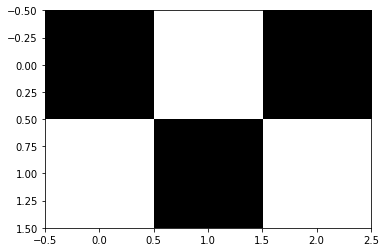

In [0]:
'''
from matplotlib import pyplot as plt
plt.imshow(a)
plt.show()
'''

In [0]:
from keras.preprocessing import utils

In [13]:
# 預處理
xtrain = xtrain.astype(np.float32) / 255
xpredict = xpredict.astype(np.float32) / 255
print(xtrain.shape)
print(xpredict.shape)

# OHE
ytrain = utils.to_categorical(ytrain)
print(ytrain.shape)

(2823, 150, 150, 3)
(2000, 150, 150, 3)
(2823, 5)


### 5.訓練資料分割(Training Data split to train and test)
***
- 將訓練資料切分為訓練和驗證：
  1. 訓練資料：用來訓練模型
  2. 驗證資料：用來驗證訓練好的模型結果如何

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2117, 150, 150, 3)
(706, 150, 150, 3)
(2117, 5)
(706, 5)


### 6.建立模型
***
- 使用自己建立模型
- 使用預訓模型(Pre-train model)：VGG16、ResNet50...
  - 這邊使用預訓模型VGG16進行預測


In [0]:
from keras.layers import Dense, Flatten, BatchNormalization
from keras.layers import MaxPooling2D, Conv2D
from keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

### 6.建立模型
***
- include_top=False：取消Flatten()開始的後面幾層，因為我們要預測的類別只有5種，因此我們關掉後面幾層，自己定義後面那幾層的種類。

In [16]:
from keras.applications import VGG16

base_model=VGG16(include_top=False, weights='imagenet',input_shape=(150,150,3), pooling='avg')
base_model.summary()

58892288/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

### 6.建立模型
***
- 加入我們關閉的那幾層

In [18]:
model=Sequential()
model.add(base_model)

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 14,848,325
Trainable params: 14,847,813
Non-trainable params: 512
_________________________________________________________________


### 7.利用callbacks，優化模型準確率方法
***
- 增加訓練數據：由於訓練數據本身就少，又經過我們分成訓練集和驗證集，因此透過ImageDataGenerator就可以增加我們的數據
- 使用動態學習率：隨著epochs的增加，更改學習率(learning rate)
- 自動降低學習率：設定val_acc在進行幾次epoch沒有上升時，降低學習率(lr)
- 自動儲存最佳模型：保留最佳模型或weights檔(.h5)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [0]:
# 學習率動態調整。當跑到第幾個 epcoh 時，根據設定修改學習率。這邊的數值都是參考原 paper
def lr_schedule(epoch):
    """Learning Rate Schedule
    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.
    # Arguments
        epoch (int): The number of epochs
    # Returns
        lr (float32): learning rate
    """
    lr = 1e-4
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 100:
        lr *= 1e-3
    elif epoch > 60:
        lr *= 1e-1
    elif epoch > 30:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [0]:
# 使用動態調整學習率
lr_scheduler = LearningRateScheduler(lr_schedule)

# 使用自動降低學習率 (當 validation loss 連續 5 次沒有下降時，自動降低學習率)
lr_reducer = ReduceLROnPlateau(monitor='val_acc', 
                               factor=0.1,
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

# 紀錄最佳model
root_path = 'drive/My Drive/ML100_Colab Notebooks/11.ML100_Final test/'
save_best = ModelCheckpoint(filepath=root_path + 'best_adam.h5',
                            monitor='val_loss',
                            save_weights_only=True,
                            save_best_only=True)
#checkpoint = [save_best]

# 設定 callbacks
callbacks = [lr_reducer, save_best, lr_scheduler]

In [24]:
batch_size=128
epochs=50


#opt = keras.optimizers.SGD(lr=1e-2, momentum=0.9, nesterov=True)
model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 14,848,325
Trainable params: 14,847,813
Non-trainable params: 512
_________________________________________________________________


### 8.進行模型擬合

In [25]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              verbose = 1, 
                              validation_data = (x_test, y_test),
                              callbacks=callbacks)

Epoch 1/50
Learning rate:  0.0001
16/16 [==============================] - 21s 1s/step - loss: 0.9137 - acc: 0.6504 - val_loss: 0.9481 - val_acc: 0.6827
Epoch 2/50
Learning rate:  0.0001
16/16 [==============================] - 13s 791ms/step - loss: 0.5121 - acc: 0.8143 - val_loss: 0.5762 - val_acc: 0.7918
Epoch 3/50
Learning rate:  0.0001
16/16 [==============================] - 12s 770ms/step - loss: 0.3850 - acc: 0.8678 - val_loss: 0.4408 - val_acc: 0.8300
Epoch 4/50
Learning rate:  0.0001
16/16 [==============================] - 12s 773ms/step - loss: 0.3164 - acc: 0.8847 - val_loss: 0.4344 - val_acc: 0.8499
Epoch 5/50
Learning rate:  0.0001
16/16 [==============================] - 13s 792ms/step - loss: 0.2528 - acc: 0.9160 - val_loss: 0.7322 - val_acc: 0.7691
Epoch 6/50
Learning rate:  0.0001
16/16 [==============================] - 12s 762ms/step - loss: 0.2327 - acc: 0.9213 - val_loss: 0.5033 - val_acc: 0.8244
Epoch 7/50
Learning rate:  0.0001
16/16 [==========================

In [26]:
model.evaluate(x_test, y_test)

706/706 [==============================] - 1s 2ms/step


[0.4346932905591581, 0.8895184135977338]

### 9.載入最佳模型或weights

In [0]:
from keras.models import load_model

In [28]:
model.load_weights(root_path + 'best_adam.h5')
model.evaluate(x_test, y_test)

706/706 [==============================] - 1s 1ms/step


[0.3917372247293887, 0.8937677053824362]

### 10.進行預測資料的預測
***
- 進行預測
- 將預測結果儲存csv檔

In [29]:
pre = model.predict_classes(xpredict)
print(pre.shape)

(2000,)


In [0]:
import pandas as pd

path = 'drive/My Drive/ML100_Colab Notebooks/11.ML100_Final test/image_data/test/'
files_name = os.listdir(path)
id = list()
for i in range(len(files_name)):
    name = os.path.splitext(files_name[i])[0]
    id.append(name)

df = {'id':id, 'flower_class':pre}
pred_result = pd.DataFrame(df)
pred_result.to_csv('drive/My Drive/ML100_Colab Notebooks/11.ML100_Final test/my_pred_VGG.csv', index=0)
